In [ ]:
import numpy as np
import pandas as pd
import random


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
data = pd.read_csv('/content/drive/My Drive/pima.csv',sep=',' , header = 0)

attributes = ["pregnancies", "glucose", "blood pressure", "skin thickness", "insulin","BMI","Diabetes","age","output"]
data.columns = attributes
data.head()

Mounted at /content/drive


,pregnancies,glucose,blood pressure,skin thickness,insulin,BMI,Diabetes,age,output
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
df = data.iloc[:, 0:8]
label=data.iloc[:, 8]

In [ ]:
print(df.head())

   pregnancies  glucose  blood pressure  ...   BMI  Diabetes  age
0            1       85              66  ...  26.6     0.351   31
1            8      183              64  ...  23.3     0.672   32
2            1       89              66  ...  28.1     0.167   21
3            0      137              40  ...  43.1     2.288   33
4            5      116              74  ...  25.6     0.201   30

[5 rows x 8 columns]


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_x=StandardScaler()
X=scaler_x.fit_transform(df)
df = pd.DataFrame(X, columns = ["pregnancies", "glucose", "blood pressure", "skin thickness", "insulin","BMI","Diabetes","age"])


In [ ]:
df.head()

,pregnancies,glucose,blood pressure,skin thickness,insulin,BMI,Diabetes,age
0,-0.843726,-1.122086,-0.160249,0.532023,-0.693559,-0.683729,-0.364265,-0.188940
1,1.234240,1.944476,-0.263578,-1.286882,-0.693559,-1.102301,0.604701,-0.103795
2,-0.843726,-0.996920,-0.160249,0.155698,0.122357,-0.493469,-0.919684,-1.040393
3,-1.140579,0.505069,-1.503534,0.908349,0.764674,1.409132,5.482732,-0.018650
4,0.343683,-0.152051,0.253070,-1.286882,-0.693559,-0.810569,-0.817052,-0.274086


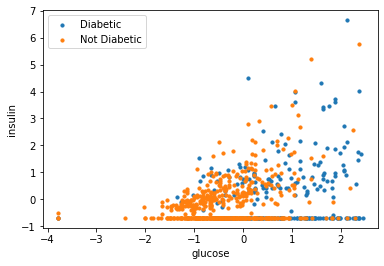

In [ ]:
diabetic = df.loc[label == 1]
not_diabetic = df.loc[label == 0]
plt.scatter(diabetic.iloc[:, 1], diabetic.iloc[:, 4], s=10, label='Diabetic')
plt.scatter(not_diabetic.iloc[:, 1], not_diabetic.iloc[:, 4], s=10, label='Not Diabetic')
plt.xlabel("glucose")
plt.ylabel("insulin")
plt.legend()
plt.show()

In [ ]:
#splitting the model into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.30, random_state=101)

In [ ]:
#training a logistics regression model
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print("Accuracy = "+ str(accuracy_score(y_test,predictions)))

Accuracy = 0.7402597402597403


In [ ]:
#defining various steps required for the genetic algorithm
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],y_train)
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [ ]:
chromo,score=generations(size=200,n_feat=8,n_parents=100,mutation_rate=0.10,
                     n_gen=20,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
logmodel.fit(X_train.iloc[:,chromo[-1]],y_train)
predictions = logmodel.predict(X_test.iloc[:,chromo[-1]])
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,predictions)))

[0.7748917748917749, 0.7748917748917749]
[0.7748917748917749, 0.7748917748917749]
[0.7748917748917749, 0.7748917748917749]
[0.7748917748917749, 0.7748917748917749]
[0.7748917748917749, 0.7748917748917749]
[0.7748917748917749, 0.7748917748917749]
[0.7748917748917749, 0.7748917748917749]
[0.7748917748917749, 0.7748917748917749]
[0.7748917748917749, 0.7748917748917749]
[0.7748917748917749, 0.7748917748917749]
[0.7748917748917749, 0.7748917748917749]
[0.7705627705627706, 0.7705627705627706]
[0.7748917748917749, 0.7748917748917749]
[0.7748917748917749, 0.7748917748917749]
[0.7748917748917749, 0.7748917748917749]
[0.7748917748917749, 0.7748917748917749]
[0.7748917748917749, 0.7748917748917749]
[0.7748917748917749, 0.7748917748917749]
[0.7748917748917749, 0.7748917748917749]
[0.7748917748917749, 0.7748917748917749]
Accuracy score after genetic algorithm is= 0.7748917748917749


In [ ]:
print(chromo[-1])
print(score[-1])

[ True  True False  True  True  True False  True]
0.7748917748917749


In [ ]:
print(X_train)
print(X_train.iloc[:,chromo[-1]])

     pregnancies   glucose  blood pressure  ...       BMI  Diabetes       age
710     0.343683  0.160863        0.459729  ... -0.303209 -0.098629  0.577367
58     -1.140579 -0.496257       -0.263578  ...  1.206188 -0.901573 -0.955248
216     0.640535  0.129572       -0.056919  ... -0.252473 -0.023165 -0.103795
168    -0.250022 -0.308508        1.079707  ... -0.455417  0.070411 -0.359231
642     0.046831 -0.965629       -3.570128  ... -0.506153  0.417548 -0.188940
..           ...       ...             ...  ...       ...       ...       ...
75      0.937388 -1.841789        0.459729  ...  0.077311 -0.243521  0.662512
599    -0.843726 -0.402383        0.976378  ... -0.620309 -0.216354 -0.784957
575     0.640535 -0.402383       -1.296875  ... -1.013513  1.030321  0.151641
337     1.531092  0.974441        0.459729  ...  0.280255  1.271808 -0.018650
523    -0.250022  0.129572       -0.573567  ... -0.049529 -0.967981 -0.784957

[536 rows x 8 columns]
     pregnancies   glucose  skin thickne

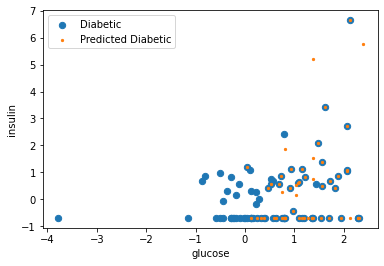

In [ ]:
test_diabetic = X_test.loc[y_test == 1]

pred_diabetic = X_test.loc[predictions == 1]

plt.scatter(test_diabetic.iloc[:, 1], test_diabetic.iloc[:, 4], s=40, label='Diabetic')
plt.scatter(pred_diabetic.iloc[:, 1], pred_diabetic.iloc[:, 4], s=5, label='Predicted Diabetic')
plt.xlabel("glucose")
plt.ylabel("insulin")
plt.legend()
plt.show()